In [4]:
#plot using seaborn on housing data set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
# Load the dataset
df = pd.read_csv('../dataset/housing_data_hot_encoded.csv')


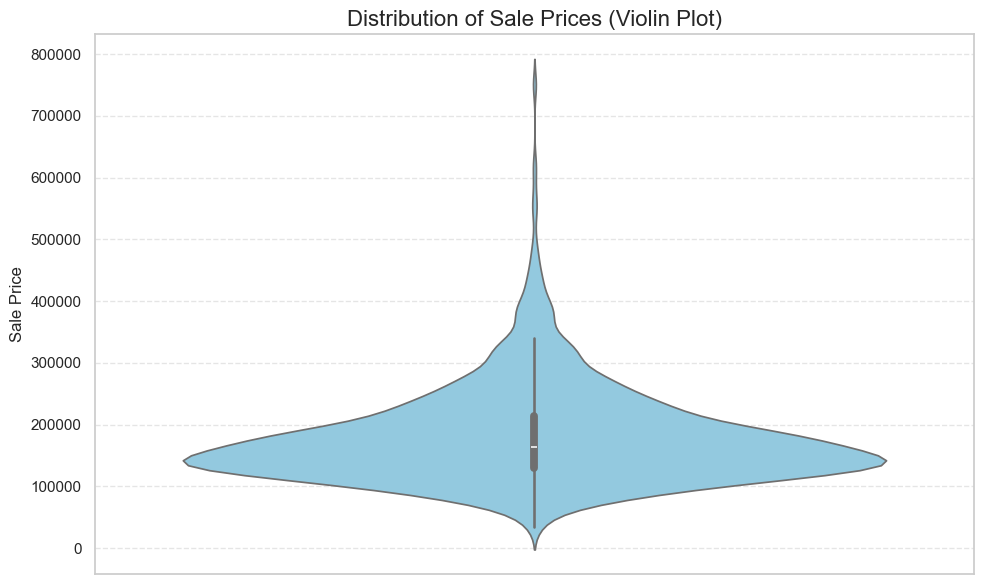

In [5]:
#violplot with respect to sales price

#Plot the Seaborn version, clean and simple
plt.figure(figsize=(10, 6))
sns.violinplot(y='SalePrice', data=df, inner='box', color='skyblue')
plt.title('Distribution of Sale Prices (Violin Plot)', fontsize=16)
plt.ylabel('Sale Price')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# Plot the Plotly version, interactive
fig = px.violin(df, y='SalePrice', box=True, points='all', color_discrete_sequence=['#1f77b4'])
fig.update_layout(
    title='Distribution of Sale Prices (Interactive Violin Plot)',
    yaxis_title='Sale Price',
    width=800,
    height=600
)
fig.show()

## Step 2: Use a pairplot to visualise relationship between different lotarea, yearbuilt and salesprice 

C:\Users\prate\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\prate\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\prate\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\prate\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\prate\AppData\L

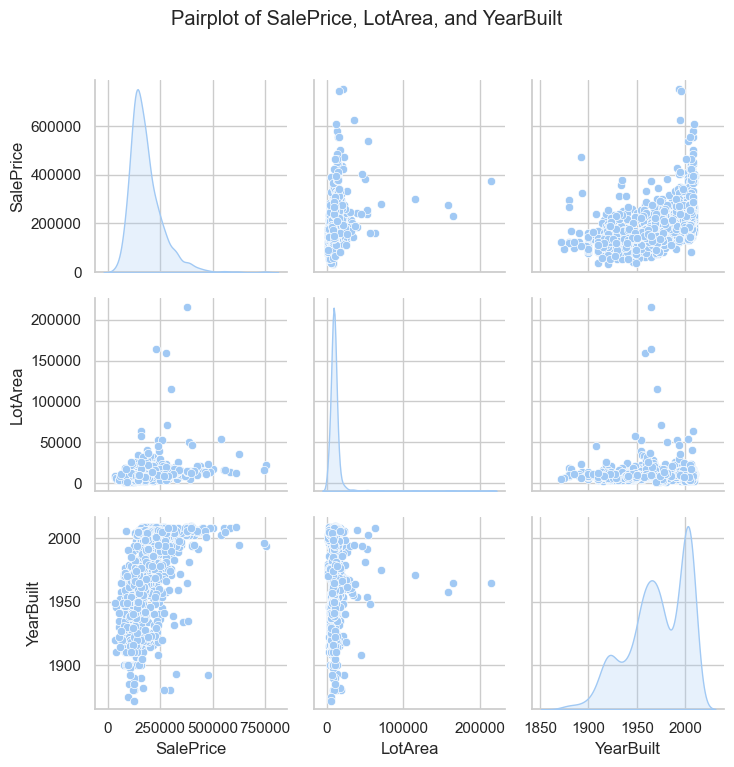

In [6]:
#pairplot with respect to sales price,LotArea,YearBuilt
# Create a pairplot with respect to SalePrice, LotArea, and YearBuilt
sns.pairplot(df, vars=['SalePrice', 'LotArea', 'YearBuilt'], diag_kind='kde', markers='o', palette='husl')
plt.suptitle('Pairplot of SalePrice, LotArea, and YearBuilt', y=1.02)
plt.tight_layout()
plt.show()
# Create a Plotly version of the pairplot
fig = px.scatter_matrix(df, dimensions=['SalePrice', 'LotArea', 'YearBuilt'], color='SalePrice',
                          title='Pairplot of SalePrice, LotArea, and YearBuilt (Interactive)',
                          color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    width=800,
    height=800,
    title_x=0.5
)
fig.show()


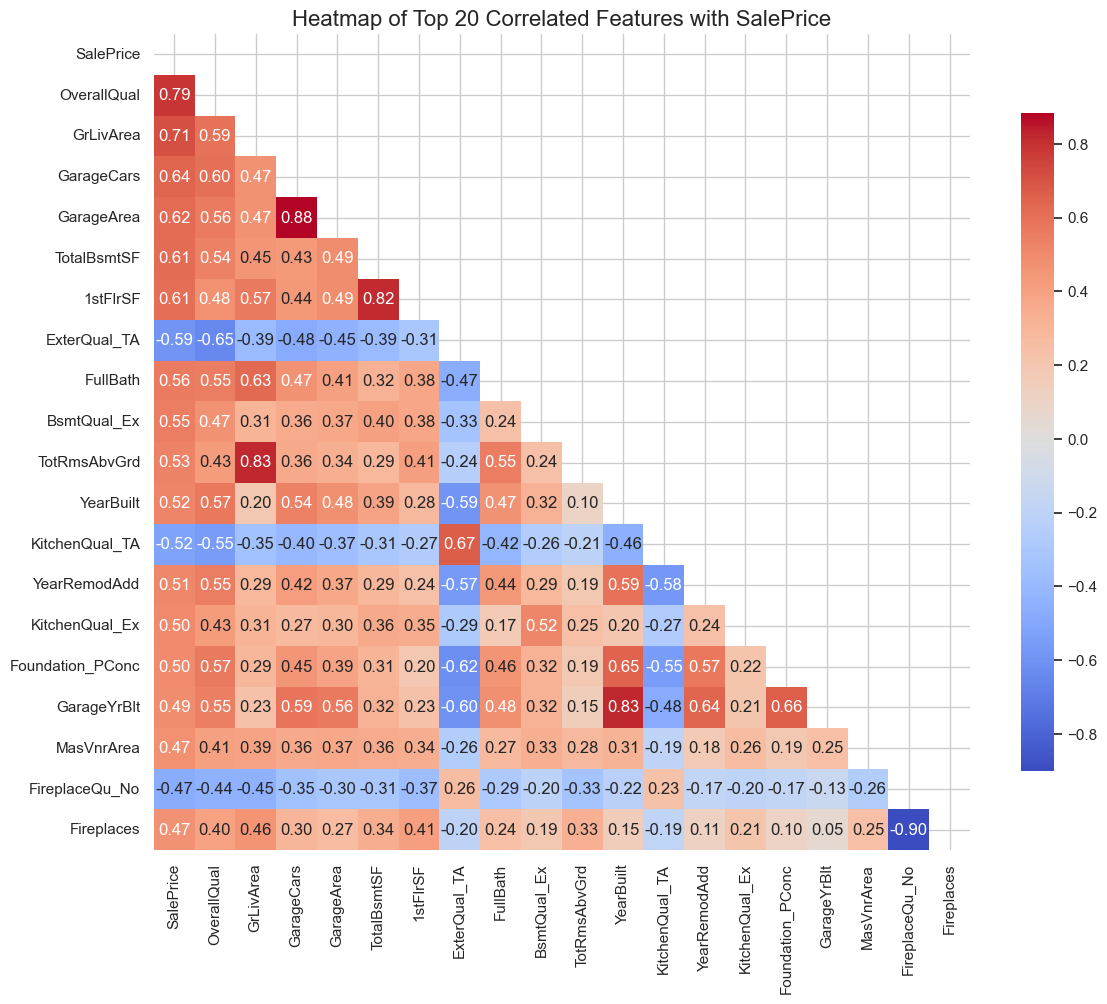

In [8]:
#heatmap with respect to top 20 correlated features
# Calculate the correlation matrix with respect to SalePrice
corr_matrix = df.corr()
# Select the top 20 correlated features with respect to SalePrice
top_corr_features = corr_matrix['SalePrice'].abs().nlargest(20).index
# Create a heatmap of the top 20 correlated features and show top triangle
# Mask the upper triangle of the heatmap
mask = np.triu(np.ones_like(df[top_corr_features].corr(), dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df[top_corr_features].corr(), mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Top 20 Correlated Features with SalePrice', fontsize=16)
plt.tight_layout()
plt.show()
# Create a Plotly version of the heatmap
fig = px.imshow(df[top_corr_features].corr(), color_continuous_scale='RdBu', aspect='auto',
                  title='Heatmap of Top 20 Correlated Features with SalePrice (Interactive)')
fig.update_layout(
    width=800,
    height=800,
    title_x=0.5
)
fig.show()


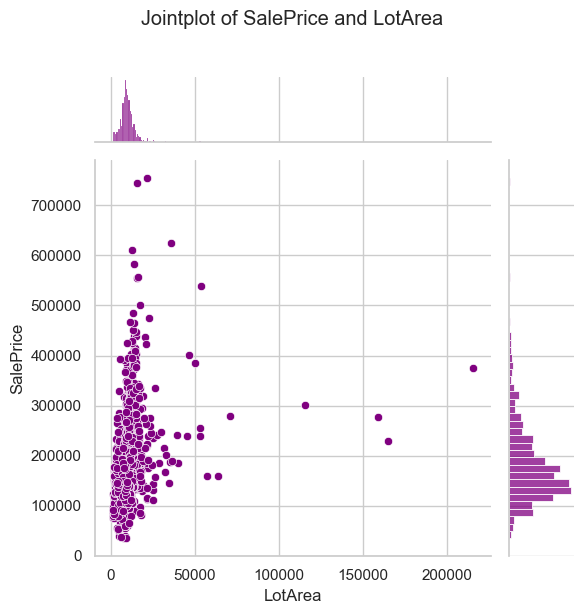

In [10]:
#jointplot with respect to sales price and LotArea
# Create a jointplot with respect to SalePrice and LotArea
sns.jointplot(x='LotArea', y='SalePrice', data=df, kind='scatter', color='purple')
plt.suptitle('Jointplot of SalePrice and LotArea', y=1.02)
plt.tight_layout()
plt.show()
# Create a Plotly version of the jointplot
fig = px.scatter(df, x='LotArea', y='SalePrice', color='SalePrice', title='Jointplot of SalePrice and LotArea (Interactive)',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update_traces(marker=dict(size=5, opacity=0.7), selector=dict(mode='markers'))
fig.update_layout(
    width=800,
    height=600,
    title_x=0.5
)
fig.show()


In [12]:
#create a swarmplot with respect to one hot encoded neighborhood and sales price
# get all Neighborhoods which are one hot encoded with neighbouhood_ prefix
neighborhood_columns = [col for col in df.columns if col.startswith('neighborhood_')]
# Create a new DataFrame with the relevant columns
neighborhood_df = df[['SalePrice'] + neighborhood_columns]
# plot swarmplot with respect to SalePrice and all neighborhoods
plt.figure(figsize=(12, 6))
sns.swarmplot(data=neighborhood_df, x='SalePrice', y=neighborhood_columns[0], color='purple')
plt.title('Swarmplot of SalePrice and Neighborhoods', fontsize=16)
plt.xlabel('Sale Price')
plt.ylabel('Neighborhoods')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()





IndexError: list index out of range

<Figure size 1200x600 with 0 Axes>